In [1]:
from matplotlib.pyplot import imshow
import numpy as np
import matplotlib.pyplot as plt

In [582]:
#boring people know it's actually cross-correlation
def convolution5x5(img, kernel):
    
    pixel = lambda local, kernel: (local * kernel).sum()
    get_local = lambda image, i, j: image[i:i+5, j:j+5]
    
    result = np.zeros_like(img)[4:, 4:]
    for i in range(0, result.shape[0]):
        for j in range(0, result.shape[1]):
            p = pixel(get_local(img, i, j), kernel)
            if p > 128:
                result[i,j] = p
    return result

In [579]:
def fetch(url):
    import requests, gzip, os, hashlib, numpy
    fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            dat = f.read()
    else:
        with open(fp, "wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()


X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
"""Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]"""

'Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]\nX_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))\nY_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]'

In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
def fetch(url):
    import requests, gzip, os, hashlib, numpy
    fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    if os.path.isfile(fp):
        print("already present")
        with open(fp, "rb") as f:
            dat = f.read()
    else:
        with open(fp, "wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return numpy.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()


X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))

In [16]:
Y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]

In [18]:
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))

In [19]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

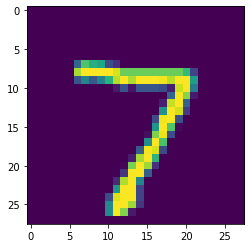

In [20]:
imshow(X_test[0])

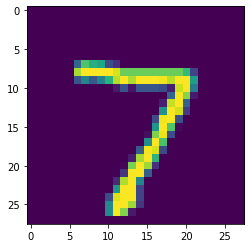

In [21]:
x = X_test[0]
imshow(x)

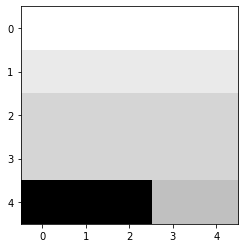

In [38]:
kernel = np.array([[2, 2, 2, 2, 2],
                   [1, 1, 1, 1, 1],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0],
                   [-10, -10, -10, -1, -1]])
imshow(kernel, cmap="gray")

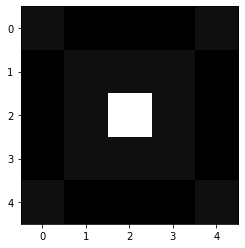

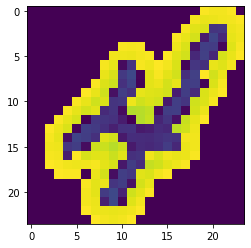

In [114]:
kernel = np.array([[0, -1,-1,-1, 0],
                   [-1, 0, 0, 0,-1],
                   [-1, 0,16, 0,-1],
                   [-1 , 0, 0, 0,-1],
                   [0,-1,-1,-1, 0]])/64
imshow(kernel, cmap="gray")
plt.show()

"""kernel = np.array([[1, 4, 6, 4, 1], 
                   [4, 16, 24, 16, 4],
                   [6, 24, 36, 24, 6],
                   [4, 16, 24, 16, 4], 
                   [1, 4, 6, 4, 1]]) / 256"""

imshow(convolution5x5(X_train[9], kernel))

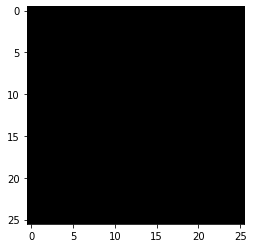

In [243]:
def convolution3x3(img, kernel):
    
    pixel = lambda local, kernel: (local * kernel).sum()
    get_local = lambda image, i, j: image[i:i+3, j:j+3]
    
    result = np.zeros_like(img)[2:, 2:]
    for i in range(0, result.shape[0]):
        for j in range(0, result.shape[1]):
            p = pixel(get_local(img, i, j), kernel)
            if p > 128:
                result[i,j] = p
    return result

kernel = np.array([[0, 0, -1],
                   [0, 0, 0], 
                   [-1,0, 0]])
                   
imshow(convolution3x3(x, kernel.T),cmap='gray')

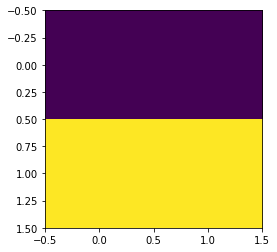

In [62]:
u = np.array([[-1,-1],
              [1, 1]])
imshow(u)

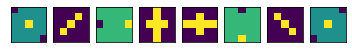

In [601]:
kernels = np.array(
    [
    np.array([[-1,0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0,-1]]),       
    
    np.array([[0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0],
              [0, 0, 1, 0, 0],
              [0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0]]) / 3,
    
    np.array([[0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [-2,0, 0, 0, 1],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0]]),    
    
    np.array([[0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 1, 1, 1, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0]]) / 7,
   
    np.array([[0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [1, 1, 1, 1, 1],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0]]) / 7,      
 
    np.array([[0, 0, -2, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0],
              [0, 0, 1, 0,0]]),    
    
    np.array([[0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0]]) / 3,    
    
    np.array([[0, 0, 0, 0, -1],
              [0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0],
              [-1, 0, 0, 0, 0]])
    ]
)

plt.figure()
for i in range(8):
    plt.subplot(1,8,i+1)
    imshow(kernels[i])
    
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);

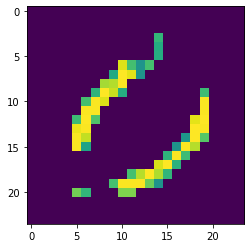

In [594]:
imshow(convolution5x5(X_train[1], kernels[0]))

In [632]:

def convlayer(img):
    return  np.array([convolution5x5(img, ker)
                      for ker in kernels])

In [624]:
def maxpool(img):
    h = int(img.shape[0]/4)
    w = int(img.shape[1]/4)
    result = np.zeros((h, w))
    chunk = lambda image, i, j: image[i:i+4, j:j+4]
    for i in range(h):
        for j in range(w):
            result[i,j] = np.max(chunk(img, 4*i, 4*j))
    return result    

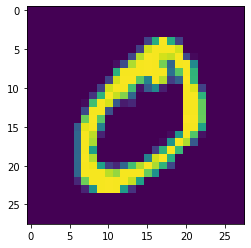

In [625]:
imshow(X_train[1])

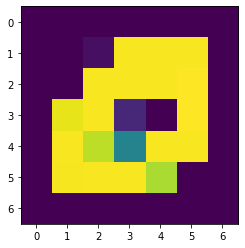

In [626]:
imshow(maxpool(X_train[1]))

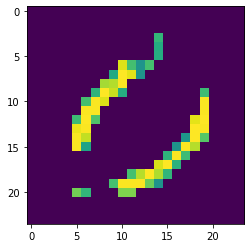

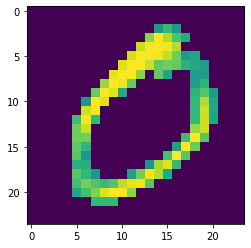

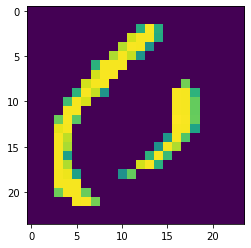

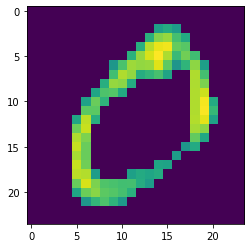

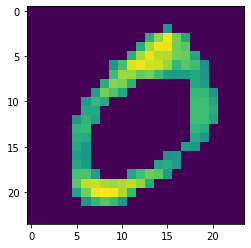

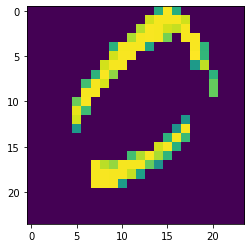

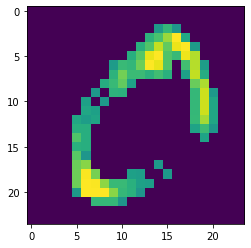

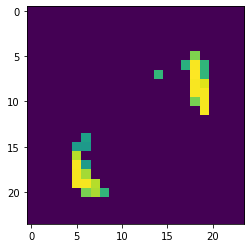

In [627]:
x = X_train[1]
y = convlayer(x)
for im in y:
    imshow(im)
    plt.show()

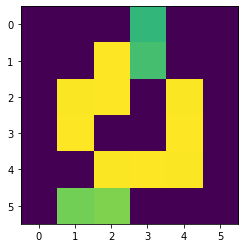

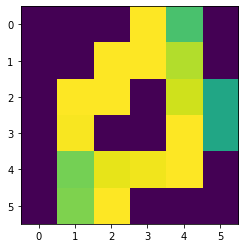

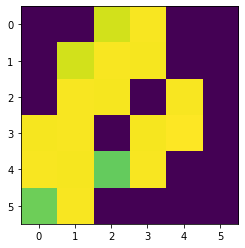

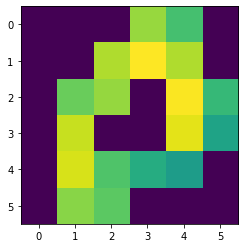

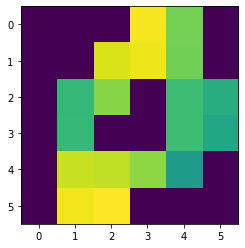

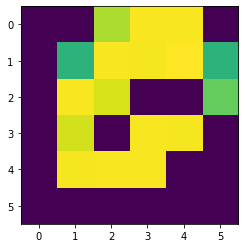

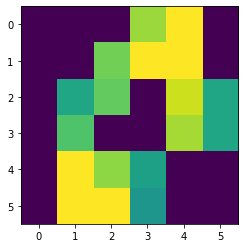

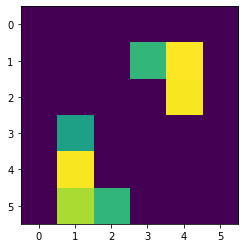

In [628]:
for im in y:
    imshow(maxpool(im))
    plt.show()

In [630]:
def mplayer(layer):
    return np.array([maxpool(im) for im in layer])

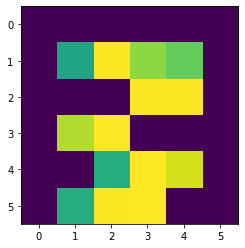

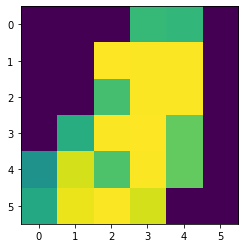

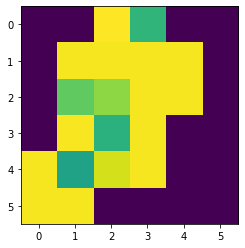

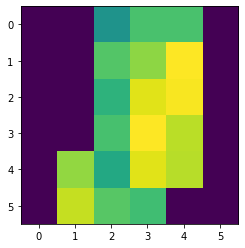

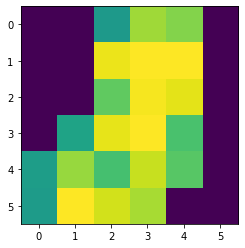

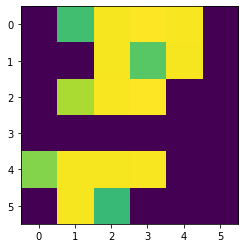

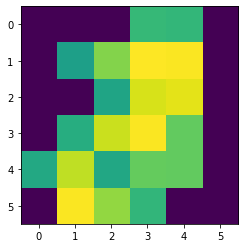

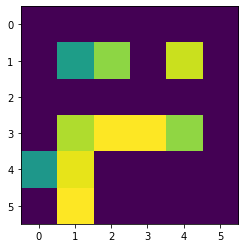

In [645]:
for im in mplayer(convlayer(X_train[7])):
    imshow(im)
    plt.show()

In [656]:
def F(s2):
    return np.concatenate([s.reshape(1, -1)[0] for s in s2]).reshape(-1,1)

def feedwfd(img):
    
    flat = lambda layer: np.concatenate(
        [im.reshape(1, -1)[0] for im in layer]
    ).reshape(-1,1)
    
    return flat(mplayer(convlayer(img)))

#took 17 seconds
#for i in range(1000):
 #   feedwfd(X_train[i])



datetime.timedelta(seconds=17, microseconds=340323)

In [660]:
import numpy as np
from matplotlib.pyplot import imshow
from matplotlib.pyplot import plot
from matplotlib.pyplot import show


def m(m, n):
    matrix = np.random.uniform(-2, 2, size=(m,n))
    return matrix / np.sqrt(m*n)

relu = lambda x: np.maximum(x, 0.)



def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

#layer 2 activation
def matrix_softmax(m):
    return np.apply_along_axis(softmax, 0, m)

def row(n):
    return [1 if i == n else 0 for i in range(10)]

#picks a batch of train inputs of size bs and number i;
#used in training loop;
def get_batch(x, bs, i):
    return x[bs*i : bs*(i+1)]

#picks a batch of train outputs;
def get_y(y, bs, i):
    return y[bs*i : bs*(i+1)].T

y = np.array([row(n) for n in Y_train])


# A forward pass.

In [688]:
after_conv = np.array([feedwfd(img) for img in X_train[:10000]])

In [724]:
(after_conv[1:4].T).shape
def get_batch2(x, bs, i):
    return x[bs*i : bs*(i+1)].T 
get_batch2(after_conv, 4, 1).shape

(1, 288, 4)

(1, 288, 10000)

In [729]:
l1.shape

(1, 128, 4)

In [728]:

#random parameters;

W1 = m(10, 288)
b1 = m(10, 1)

#input batch;

#hidden layer;


#l2 is output;
x2 = W1 @ get_batch2(after_conv, 4, 1) + b1
x2.shape

(1, 10, 4)

In [678]:


#"jacobians" for computing 4 useful gradients;
dloss_dx2 = (l2 - get_y(y, 2, 1)).T
dx2_dl1 = W1
dx1_dW0 = x0[0]
dx2_dW1 = (x[0].T)

#chain rule; currently it's ugly;
#these 4 will be used in SGD;
#but like any enterprise, when under a new management, 
#there's always a slight duplication of efforts;
dloss_dW1 = dloss_dx2.T @ dx2_dW1
dloss_db0 = ((dloss_dx2 @ dx2_dl1 * (l1[0]>0).T  )).sum(axis=0).reshape(-1,1)
dloss_db1 = (dloss_dx2.T).sum(axis=1).reshape(-1,1)

NameError: name 'x0' is not defined

In [730]:
#encodes lables from 1 to [0, 1, 0, 0..] as prob. distr.;
#so it could be compared to predicted prob. distr.;
def row(n):
    return [1 if i == n else 0 for i in range(10)]

#picks a batch of train inputs of size bs and number i;
#used in training loop;
def get_x(x, bs, i):
    return x[bs*i : bs*(i+1)]

#picks a batch of train outputs;
def get_y(y, bs, i):
    return y[bs*i : bs*(i+1)].T



#prepare data for training;
y = np.array([row(n) for n in Y_train])
x = np.array([m.reshape(-1, 1) for m in X_train])
x = x / 255


#random parameters;
W0 = m(128, 784)
b0 = m(128, 1)
W1 = m(10, 128)
b1 = m(10, 1)

#input batch;
x0 = get_x(x, 4, 1).T

#hidden layer;
x1 = W0 @ x0 + b0
l1 = relu(x1)

#l2 is output;
x2 = W1 @ l1 + b1
l2 = matrix_softmax(x2[0])
x2.shape

(1, 10, 4)

In [686]:
l1[0].shape

(128, 4)

In [736]:





#calculates gradients on a batch with given parameters;
#will be used in gradient descent;
def grads(train, labels,  W1, b1):

    l1 = train
    x2 = W1 @ l1 + b1
    l2 = matrix_softmax(x2[0])

    dloss_dx2 = (l2 - labels).T
    dx2_dl1 = W1
    dx2_dW1 = (l1[0].T)
 
    dloss_dW1 = dloss_dx2.T @ dx2_dW1
    dloss_db1 = (dloss_dx2.T).sum(axis=1).reshape(-1,1)
    
    return ( dloss_dW1,  dloss_db1)

In [732]:
10000/100

100.0

In [740]:

W1 = m(10, 288)
b1 = m(10, 1)

#training loop with batch size 256 and learning rate 0.0045
#230 epoches
lr = 0.0045
for i in range(100):

    x_train = get_batch2(after_conv, 100, i)
    y_train = get_y(y, 100, i)
    
    #how sensitive is loss to small changes in parameters?
    dloss_dW1,  dloss_db1 = grads(x_train, y_train, W1,  b1)
    
    #minimising loss by nudging parameters;
    W1 = W1 - dloss_dW1 * lr
    b1 = b1 - dloss_db1 * lr
    #getting better parameters as a result;


In [741]:
def predict(img):
    l1 = img
    x2 = W1 @ l1 + b1
    l2 = softmax(x2)
    return np.argmax(l2)

In [747]:
predict(get_batch2(after_conv, 1, 5))

2

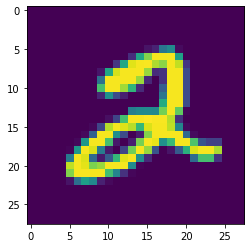

In [748]:
imshow(X_train[5
              ])

In [749]:
xx_test = np.array([feedwfd(img) for img in X_test[:10000]])

In [751]:
def get_examnple(i):
    return get_batch2(xx_test, 1, i)

In [753]:
get_examnple(1)

array([[[  0.],
        [253.],
        [253.],
        [218.],
        [  0.],
        [  0.],
        [  0.],
        [253.],
        [210.],
        [253.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [253.],
        [253.],
        [  0.],
        [  0.],
        [  0.],
        [210.],
        [253.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [253.],
        [210.],
        [233.],
        [253.],
        [253.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [252.],
        [253.],
        [181.],
        [  0.],
        [  0.],
        [  0.],
        [252.],
        [224.],
        [253.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [253.],
        [253.],
        [  0.],
        [  0.],
        [  0.],
        [251.],
        [253.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [251.],
        

In [759]:
predict(get_examnple(5))

1

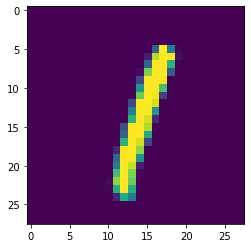

In [760]:
imshow(X_test[5])

In [763]:
yt = np.array([row(n) for n in Y_test])

mistakes = sum([(predict(get_examnple(i)) - np.argmax(yt[i]) != 0) + 0. for i in range(10000)])
(10000 - mistakes) / 10000


0.8838